<a href="https://colab.research.google.com/github/matsunagalab/lecture_ML/blob/main/machine_learning_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第6回 識別その2: サポートベクトルマシン

## 前回の2クラスデータの識別

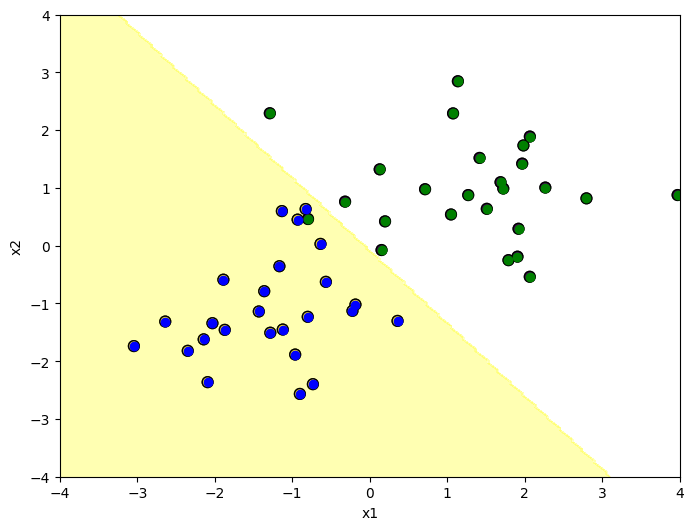

In [ ]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
np.random.seed(seed=321)

# generate data
N = 50

y_class1 = np.ones(int(N/2))
x_class1 = np.random.randn(int(N/2), 2) - 1.0

y_class2 = -np.ones(int(N/2))
x_class2 = np.random.randn(int(N/2), 2) + 1.0

y = np.concatenate((y_class1, y_class2))
x = np.concatenate((x_class1, x_class2))

# Plotting initial data
plt.figure(figsize=(8,6))
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('x1')
plt.ylabel('x2')

# SVM modeling
model = svm.SVC(kernel='linear')
model.fit(x, y)

# visualize result
x1_range = np.linspace(-4, 4, 200)
x2_range = np.linspace(-4, 4, 200)
x1, x2 = np.meshgrid(x1_range, x2_range)
Z = model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

plt.contourf(x1, x2, Z, alpha=0.3, colors=['white', 'yellow'])
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', s=60)

plt.scatter(x[:N//2, 0], x[:N//2, 1], color='blue')
plt.scatter(x[N//2:, 0], x[N//2:, 1], color='green')

plt.show()

## 前回の2クラスデータの識別。異常値(outlier)がある場合

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


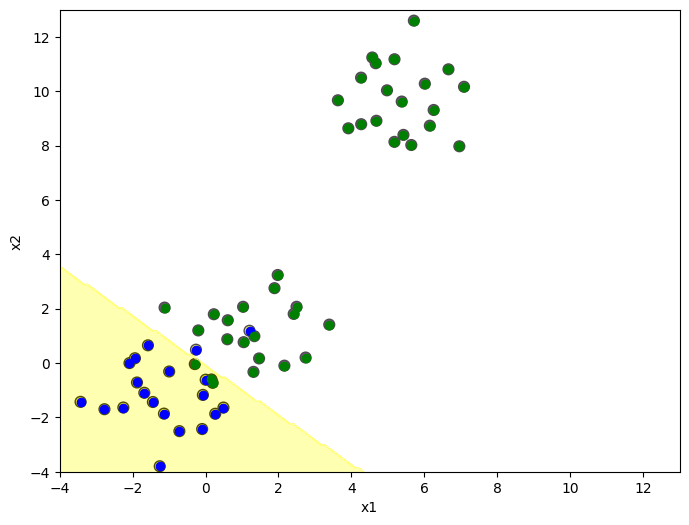

In [ ]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
np.random.seed(seed=123)

# Set the number of data points
N = 60

# Generate the data
x_class1 = np.random.randn(N//3, 2) - 1.0
y_class1 = np.ones((N//3, 1))
x_class2 = np.random.randn(N//3, 2) + 1.0
y_class2 = -np.ones((N//3, 1))
x_class2_outlier = np.random.randn(N//3, 2) + [5.0, 10.0]
y_class2_outlier = -np.ones((N//3, 1))

y = np.concatenate((y_class1, y_class2, y_class2_outlier))
x = np.concatenate((x_class1, x_class2, x_class2_outlier))

# Plotting initial data
plt.figure(figsize=(8,6))
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(-4, 13)
plt.ylim(-4, 13)
plt.xlabel('x1')
plt.ylabel('x2')

# SVM modeling
model = svm.SVC(kernel='linear')
model.fit(x, y)

# visualize result
x1_range = np.linspace(-4, 13, 200)
x2_range = np.linspace(-4, 13, 200)
x1, x2 = np.meshgrid(x1_range, x2_range)
Z = model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

plt.contourf(x1, x2, Z, alpha=0.3, colors=['white', 'yellow'])

plt.scatter(x[:N//3, 0], x[:N//3, 1], color='blue')
plt.scatter(x[N//3:2*N//3, 0], x[N//3:2*N//3, 1], color='green')
plt.scatter(x[2*N//3:, 0], x[2*N//3:, 1], color='green')

plt.show()

## Iris(アヤメ) data setの識別

Iris(アヤメ)}という花のデータです。現代の統計学の基礎を気づいたフィッシャーが扱ったデータなのでフィッシャーのアヤメと呼ばれます。アヤメの個体150サンプルについて、以下の4つの特徴量を計測して、その種(3種, setosa, versicolor, virginica)がラベル付けされています。特徴量と種の関係をデータから学習できるか？という問題に用いられます。例えば、ラベルを使って教師あり学習を行って種を分ける境界を探る問題や、敢えてラベルを用いずにクラスタリングを行ってその性能を検証する問題です。そうした機械学習の手法を評価検証する用途で用いられることが多いです。

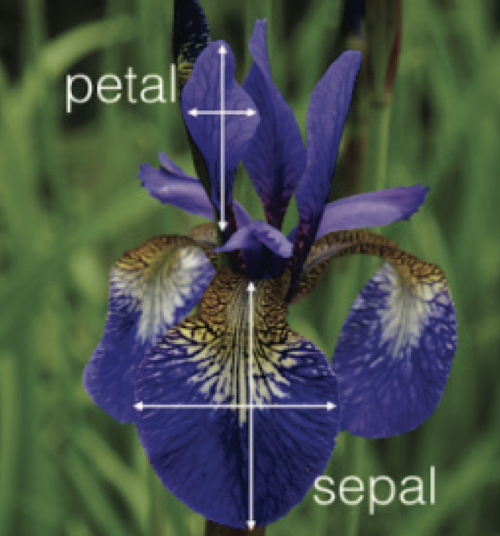

### カーネルトリックを使わない場合 (linearカーネルを使う場合に相当)

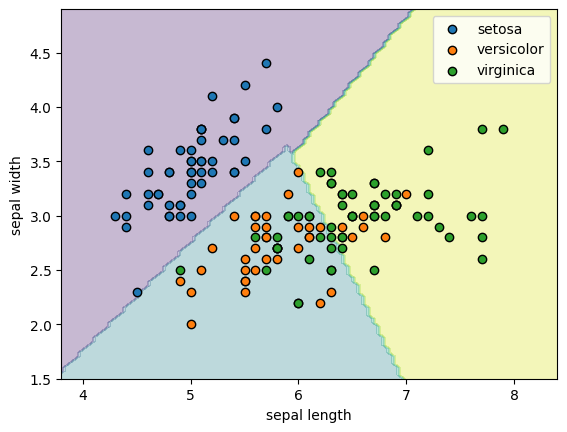

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Use only sepal length and sepal width features
X = iris.data[:, :2]
Y = iris.target

# Train a linear SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# Create a grid for the contour plot
x1 = np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100)
x2 = np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Compute the decision boundary
Z = clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot the decision boundary
contour = plt.contourf(X1, X2, Z, alpha=0.3, cmap='viridis')

# Plot the data points with labels
for i in range(max(Y)+1):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], edgecolor='k', label=iris.target_names[i])

plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()
plt.show()

### カーネルトリックを使う場合(カーネルとしてRBF(Radial Basis Kernel)を使う場合)

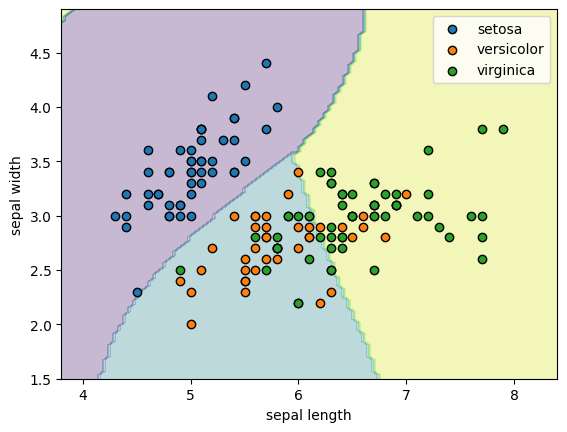

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Use only sepal length and sepal width features
X = iris.data[:, :2]
Y = iris.target

# Train an SVM classifier with RBF kernel and specified parameters
clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
clf.fit(X, Y)

# Create a grid for the contour plot
x1 = np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100)
x2 = np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Compute the decision boundary
Z = clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot the decision boundary
contour = plt.contourf(X1, X2, Z, alpha=0.3, cmap='viridis')

# Plot the data points with labels
for i in range(max(Y)+1):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], edgecolor='k', label=iris.target_names[i])

plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()
plt.show()